In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [284]:
# import the dataset
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

In [285]:
# remove all 'Make' values that occur less than 20 times
df = df[df.groupby('Make')['Make'].transform('count') > 20]

In [286]:
# Define a function to normalize the 'Make' values
def normalize_make(make):
    if isinstance(make, str):
        return make.lower().strip()
    return make

# Define a function to standardize and clean the 'Make' values
def clean_make(make):
    if isinstance(make, str):
        replacements = {
            "beechcraft": "beech",
            "cessna aircraft co": "cessna",
            "robinson helicopter": "robinson",
            "robinson helicopter co": "robinson",
            "robinson helicopter company": "robinson",
            "air tractor inc": "air tractor",
            "airbus industrie": "airbus",
            "american champion aircraft": "american champion",
            "american": "american champion",
            "aviat aircraft inc": "aviat",
            "bell helicopter textron canada": "bell",
            "bell helicopter textron": "bell",
            "boeing stearman": "boeing",
            "bombardier inc": "bombardier",
            "bombardier, inc.": "bombardier",
            "cameron": "cameron balloons",
            "cirrus": "cirrus design corp",
            "cirrus design corp.": "cirrus design corp",
            "dehavilland": "de havilland",
            "diamond": "diamond aircraft industries",
            "diamond aircraft ind inc": "diamond aircraft industries",
            "eurocopter france": "eurocopter",
            "fairchild": "fairchild hiller",
            "grumman acft eng cor-schweizer": "grumman",
            "grumman american avn. corp.": "grumman",
            "grumman-schweizer": "grumman",
            "learjet": "gates learjet",
            "Gates Lear Jet": "gates learjet",
            "GATES LEARJET CORP.": "gates learjet",
            "gulfstream american": "gulfstream",
            "gulfstream-schweizer": "gulfstream",
            "mcdonnell douglas": "mcdonnell douglas helicopter",
            "md helicopter": "mcdonnell douglas helicopter",
            "mooney aircraft corp.": "mooney",
            "piper aircraft inc": "piper",
            "robinson company": "robinson",
            "robinson co": "robinson",
            "rockwell international": "rockwell",
            "smith": "smith, ted aerostar",
            "vans aircraft": "vans",
            "ayres corporation": "ayres",
            "cirrus design corp": "cirrus",
            "grumman american": "grumman",
            "texas helicopter": "texas helicopter corp",
            "taylorcraft": "taylorcraft aviation",
            "raytheon aircraft company": "raytheon",
            "bae systems (operations) limited": "british aerospace",
            "bae": "british aerospace",
            "british aerospace civil aircr": "british aerospace",
            "the boeing company": "boeing",
            "boeing company": "boeing",
            "boeing company, long beach div": "boeing",
            "canadair": "bombardier",
            "bombardier inc.": "bombardier",
            "bombadier, inc.": "bombardier",
            "dassault": "dassault aviation",
            "embraer-empresa brasileira de": "embraer",
            "embraer s.a.": "embraer",
            "embraer sa": "embraer",
        }

        if make in replacements:
            make = replacements[make]

        # Remove extra information
        make = make.split("(")[0].strip()
        make = make.split(" ")[0].strip() if "ab (saab)" in make else make

    return make


In [287]:
# Apply the normalize_make function to the 'Make' column
df['Make'] = df['Make'].apply(normalize_make)

# Apply the clean_make function to the 'Make' column
df['Make'] = df['Make'].apply(clean_make)

# remove any value of 'unknown' in the 'Make' column
df = df[df['Make'] != 'unknown']

In [288]:
# print the number of times each 'Make' value occurs
df['Make'].value_counts()

cessna              27173
piper               14897
beech                5397
boeing               2796
bell                 2766
                    ...  
thunder and colt       23
barnes                 22
pzl-mielec             22
garlick                22
temco                  21
Name: Make, Length: 117, dtype: int64

In [289]:
# Define a function to standardize and clean the 'Model' values
def clean_model(model):
    if isinstance(model, str):
        replacements = {
            "1124A": "1124",
            "1125 WESTWIND ASTRA": "1125",
            "35A-300": "35A",
            "AVRO  146": "AVRO 146",
            "AVRO 146-RJ70A": "AVRO 146",
            "AVRO 146-RJ85": "AVRO 146",
            "AVRO146RJ - 100": "AVRO 146",
            "Beechjet 400A": "Beechjet 400",




        }

        if model in replacements:
            model = replacements[model]

        # Remove extra information
        model = model.split("(")[0].strip()
        model = model.split(" ")[0].strip() if "ab (saab)" in model else model

    return model

In [290]:
# Boeing Model Name Cleaner

df.loc[df['Make'].str.lower() == 'boeing', 'Model'] = df.loc[df['Make'].str.lower() == 'boeing', 'Model'].apply(lambda x: str(x)[7:10] if str(x).upper() == 'BOEING' else str(x).replace('B', '').replace('-', '')[:3])


In [291]:
# Airbus Model Name Cleaner
df.loc[df['Make'] == 'airbus', 'Model'] = df.loc[df['Make'] == 'airbus', 'Model'].apply(lambda x: x[:5] if x[:5] == 'A-XXX' else x)
df.loc[df['Make'] == 'airbus', 'Model'] = df.loc[df['Make'] == 'airbus', 'Model'].apply(lambda x: 'A-XXX' if x[:4] == 'AXXX' else x)


In [292]:
# BAE Model Name Cleaner
df.loc[df['Make'] == 'british aerospace', 'Model'] = df.loc[df['Make'] == 'british aerospace', 'Model'].apply(lambda x: 'BAE 146' if x[:8] == 'BAE 146' or x[:8] == 'BAe 146' or x[:8] == 'BAE-146' else x)
df.loc[df['Make'] == 'british aerospace', 'Model'] = df.loc[df['Make'] == 'british aerospace', 'Model'].apply(lambda x: 'BAE 125' if x[:8] == 'BAE 125' else x)

In [293]:
# Bombardier Model Name Cleaner
df.loc[df['Make'] == 'bombardier', 'Model'] = df.loc[df['Make'] == 'bombardier', 'Model'].apply(lambda x: 'BD-100' if x == 'BD 100-1A10' or x == 'BD-100-1A10' or x == 'BD-100-1A10' or x == 'BD-100-1A10' else x)



In [295]:
# Lockheed Model Name Cleaner
df.loc[df['Make'] == 'lockheed', 'Model'] = df.loc[df['Make'] == 'lockheed', 'Model'].apply(lambda x: x if x == '1329-23E' or x == '1329-25' else 'L-1011')


In [296]:
# testing to see that dataset still is intact after cleaning makes
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


We need to create a new dataframe so that Qi's weather analysis code can run later


In [297]:
Qdf1 = df.copy()

We need to load a new dataframe so that Scott's engine exploration code can run later


In [298]:
#load dataset
Sdf = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

In [299]:
# Only keep rows with a value of 'Turbo Fan' or 'Geared Turbofan' in the 'Engine.Type' column
df = df[df['Engine.Type'].isin(['Turbo Fan', 'Geared Turbofan'])]
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,NaN,NaN,ORD,CHICAGO O'HARE INTER'L,...,Unknown,Trans World Airlines,0.0,0.0,0.0,149.0,UNK,Cruise,Probable Cause,12-01-1983
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,NaN,NaN,NaN,WASHINGTON NATIONAL,...,Unknown,"Air Florida, Inc",78.0,6.0,3.0,0.0,IMC,Takeoff,Probable Cause,13-01-1983
155,20020917X01909,Accident,DCA82AA013,1982-01-23,"BOSTON, MA",United States,NaN,NaN,NaN,BOSTON-LOGAN INTER'L,...,Unknown,"World Airways, Inc.",2.0,4.0,24.0,182.0,IMC,Landing,Probable Cause,23-01-1983
344,20020917X02404,Accident,MIA82FA051,1982-02-17,"MIAMI, FL",United States,NaN,NaN,MIA,MIAMI INTERNATIONAL,...,Unknown,"Pan American World Airways, In",0.0,1.0,1.0,51.0,VMC,Takeoff,Probable Cause,17-02-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88090,20210904103797,Accident,WPR21LA335,2021-09-03,"Salt Lake City, UT",United States,404718N,1115840W,SLC,Salt Lake City International A,...,Unknown,Exclusive Jets LLC,0.0,0.0,0.0,6.0,VMC,NaN,The airplanes impact with birds during approa...,NaN
88946,20220406104897,Accident,WPR22LA143,2022-04-02,"Van Nuys, CA",United States,034137N,1182932W,VNY,Van Nuys,...,Executive/corporate,SANCTUS AVIATION LLC,0.0,0.0,0.0,8.0,VMC,NaN,The student pilots failure to maintain suffic...,20-07-2022
89204,20220623105307,Accident,DCA22LA134,2022-05-22,"Tacoma, WA",United States,047119N,1221625W,NaN,NaN,...,NaN,SOUTHWEST AIRLINES CO,0.0,1.0,0.0,66.0,VMC,NaN,During cruise flight with no reported turbulen...,NaN
89491,20220718105497,Accident,DCA22LA151,2022-07-02,"Santa Ana, CA",United States,334033N,0117525W,sna,John Wayne Orange County Airpo,...,NaN,SOUTHWEST AIRLINES CO,0.0,0.0,1.0,141.0,VMC,NaN,A flight attendant received a serious injury d...,NaN


In [300]:
# Filter the dataset to only include rows with a value of 'Business', 'Personal' or 'Executive/corporate' in the 'Purpose.of.flight' column
df  = df[df['Purpose.of.flight'].isin(['Business', 'Personal', 'Executive/corporate'])]

df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
737,20020917X01902,Incident,CHI82IA112,1982-04-02,"DETROIT, MI",United States,NaN,NaN,DTW,DETROIT METRO,...,Executive/corporate,NaN,0.0,0.0,0.0,8.0,VMC,Taxi,Probable Cause,02-04-1983
906,20020917X02479,Incident,MKC82IA059,1982-04-20,"ST. LOUIS, MO",United States,NaN,NaN,STL,LAMBERT-ST. LOUIS INTL,...,Executive/corporate,NaN,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,20-04-1983
1489,20020917X03815,Accident,MKC82DA099,1982-06-08,"TOPEKA, KS",United States,NaN,NaN,TOP,PHILLIP BILLARD,...,Business,NaN,0.0,1.0,0.0,1.0,VMC,Standing,Probable Cause,08-06-1983
3292,20020917X04492,Accident,DCA83AA005,1982-11-18,"MOUNTAIN VIEW, MO",United States,NaN,NaN,NaN,MOUTAIN VIEW AIRPORT,...,Business,NaN,3.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,18-11-1983
3620,20001214X41966,Accident,DCA83AA010,1983-01-03,"HAILEY, ID",United States,NaN,NaN,SUN,FRIEDMAN MEMORIAL,...,Executive/corporate,NaN,2.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85785,20200520X14844,Accident,CEN20LA185,2020-05-20,"Houston, TX",United States,293845N,0951637W,HOU,William P Hobby,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,26-09-2020
86143,20200723X40050,Accident,ERA20LA259,2020-07-22,"Montgomery, AL",United States,032185N,0862343W,MGM,Montgomery Rgnl (Dannelly Fiel,...,Personal,N425BJ LLC,0.0,0.0,0.0,2.0,VMC,NaN,NaN,26-09-2020
87367,20210524103131,Accident,ERA21LA227,2021-05-02,"Charleston, SC",United States,324141N,0080011W,JZI,CHARLESTON EXEC,...,Personal,STB AVIATION LLC,0.0,0.0,0.0,6.0,VMC,NaN,The airplane's impact with a deer during takeoff.,NaN
88946,20220406104897,Accident,WPR22LA143,2022-04-02,"Van Nuys, CA",United States,034137N,1182932W,VNY,Van Nuys,...,Executive/corporate,SANCTUS AVIATION LLC,0.0,0.0,0.0,8.0,VMC,NaN,The student pilots failure to maintain suffic...,20-07-2022


In [301]:
# create a new column that is a combination of the 'Make' and 'Model' columns
df['Make_Model'] = df['Make'] + ' ' + df['Model']

<ipython-input-301-51f48e2d124a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Make_Model'] = df['Make'] + ' ' + df['Model']


In [302]:
# Remove all rows with value of 'Unknown' in the 'Aircraft.damage' column
df = df[df['Aircraft.damage'] != 'Unknown']

# Remove all rows with no value in the 'Aircraft.damage' column
df = df[df['Aircraft.damage'].notna()]

df.head(100)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Make_Model
737,20020917X01902,Incident,CHI82IA112,1982-04-02,"DETROIT, MI",United States,NaN,NaN,DTW,DETROIT METRO,...,NaN,0.0,0.0,0.0,8.0,VMC,Taxi,Probable Cause,02-04-1983,rockwell SABRELINER 65
906,20020917X02479,Incident,MKC82IA059,1982-04-20,"ST. LOUIS, MO",United States,NaN,NaN,STL,LAMBERT-ST. LOUIS INTL,...,NaN,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,20-04-1983,rockwell NA-265-65
3292,20020917X04492,Accident,DCA83AA005,1982-11-18,"MOUNTAIN VIEW, MO",United States,NaN,NaN,NaN,MOUTAIN VIEW AIRPORT,...,NaN,3.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,18-11-1983,cessna 551
3620,20001214X41966,Accident,DCA83AA010,1983-01-03,"HAILEY, ID",United States,NaN,NaN,SUN,FRIEDMAN MEMORIAL,...,NaN,2.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,NaN,bombardier CL-600-1A11
3702,20001214X42024,Incident,LAX83IA073,1983-01-16,"LOS ANGELES, CA",United States,NaN,NaN,LAX,LOS ANGELES,...,NaN,0.0,0.0,0.0,412.0,VMC,Taxi,Probable Cause,NaN,boeing 747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53256,20020829X01483,Accident,NYC02LA172,2002-08-10,"SANDUSKY, OH",United States,41.433333,-80.652222,SKY,Griffing Sandusky Airport,...,NaN,NaN,NaN,NaN,2.0,VMC,Takeoff,Probable Cause,18-04-2003,cessna 500
53618,20021023X05375,Accident,NYC03FA002,2002-10-07,"DEXTER, ME",United States,45.008333,-69.240833,1B0,Dexter Regional Airport,...,NaN,NaN,2.0,2.0,NaN,VMC,Landing,Probable Cause,30-06-2004,cessna 525A
53924,20021220X05625,Accident,SEA03LA018,2002-12-16,"SEATTLE, WA",United States,47.516667,-122.303333,BFI,Boeing Fld/King Co Intl,...,NaN,NaN,NaN,NaN,3.0,IMC,Landing,Probable Cause,23-07-2003,hawker siddeley DH-125
55156,20030724X01192,Accident,SEA03FA147,2003-07-22,"COUPEVILLE, WA",United States,48.208056,-122.576389,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,VMC,Climb,Probable Cause,27-10-2005,cessna Citation 525


In [303]:
# Cleaning the 'Injury.Severity' column

# Check if the first 5 characters of the 'Injury.Severity' column are 'Fatal', and is greater than 5 characters.
# If it is, then set the value to 'Fatal'
df.loc[df['Injury.Severity'].str[:5] == 'Fatal', 'Injury.Severity'] = 'Fatal'

# Check if the value of the 'Injury.Severity' column matches 'Incident', 'Serious', 'Minor'. If it does, then set the value to 'Non-Fatal'
df.loc[df['Injury.Severity'].isin(['Incident', 'Serious', 'Minor']), 'Injury.Severity'] = 'Non-Fatal'

# Remove all rows with no value in the 'Injury.Severity' column
df = df[df['Injury.Severity'].notna()]

# Remove all rows with value of 'Unavailable' in the 'Injury.Severity' column
df = df[df['Injury.Severity'] != 'Unavailable']

In [304]:
df.head(100)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Make_Model
737,20020917X01902,Incident,CHI82IA112,1982-04-02,"DETROIT, MI",United States,NaN,NaN,DTW,DETROIT METRO,...,NaN,0.0,0.0,0.0,8.0,VMC,Taxi,Probable Cause,02-04-1983,rockwell SABRELINER 65
906,20020917X02479,Incident,MKC82IA059,1982-04-20,"ST. LOUIS, MO",United States,NaN,NaN,STL,LAMBERT-ST. LOUIS INTL,...,NaN,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,20-04-1983,rockwell NA-265-65
3292,20020917X04492,Accident,DCA83AA005,1982-11-18,"MOUNTAIN VIEW, MO",United States,NaN,NaN,NaN,MOUTAIN VIEW AIRPORT,...,NaN,3.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,18-11-1983,cessna 551
3620,20001214X41966,Accident,DCA83AA010,1983-01-03,"HAILEY, ID",United States,NaN,NaN,SUN,FRIEDMAN MEMORIAL,...,NaN,2.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,NaN,bombardier CL-600-1A11
3702,20001214X42024,Incident,LAX83IA073,1983-01-16,"LOS ANGELES, CA",United States,NaN,NaN,LAX,LOS ANGELES,...,NaN,0.0,0.0,0.0,412.0,VMC,Taxi,Probable Cause,NaN,boeing 747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53256,20020829X01483,Accident,NYC02LA172,2002-08-10,"SANDUSKY, OH",United States,41.433333,-80.652222,SKY,Griffing Sandusky Airport,...,NaN,NaN,NaN,NaN,2.0,VMC,Takeoff,Probable Cause,18-04-2003,cessna 500
53618,20021023X05375,Accident,NYC03FA002,2002-10-07,"DEXTER, ME",United States,45.008333,-69.240833,1B0,Dexter Regional Airport,...,NaN,NaN,2.0,2.0,NaN,VMC,Landing,Probable Cause,30-06-2004,cessna 525A
53924,20021220X05625,Accident,SEA03LA018,2002-12-16,"SEATTLE, WA",United States,47.516667,-122.303333,BFI,Boeing Fld/King Co Intl,...,NaN,NaN,NaN,NaN,3.0,IMC,Landing,Probable Cause,23-07-2003,hawker siddeley DH-125
55156,20030724X01192,Accident,SEA03FA147,2003-07-22,"COUPEVILLE, WA",United States,48.208056,-122.576389,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,VMC,Climb,Probable Cause,27-10-2005,cessna Citation 525


In [305]:
# filter df to only include rows with a value of 'Business', 'Personal' or 'Executive/corporate' in the 'Purpose.of.flight' column
df = df[df['Purpose.of.flight'].isin(['Business', 'Personal', 'Executive/corporate'])]

In [306]:
# safety score calculator version 2
aircraft_damage_points = {
    'Destroyed': 1,
    'Substantial': 2,
    'Minor': 3
}

injury_severity_points = {
    'Fatal': 1,
    'Non-Fatal': 2
}

df['Aircraft.Damage.Points'] = df['Aircraft.damage'].map(aircraft_damage_points)
df['Injury.Severity.Points'] = df['Injury.Severity'].map(injury_severity_points)

make_model_group = df.groupby(['Make', 'Model', 'Purpose.of.flight']).agg({
    'Aircraft.Damage.Points': 'mean',
    'Injury.Severity.Points': 'mean'
}).reset_index()

make_model_group['Safety.Score'] = (
        make_model_group['Injury.Severity.Points'] * 0.75 +
        make_model_group['Aircraft.Damage.Points'] * 0.25
)

# Normalize the safety scores to a range of 0-100
max_score = make_model_group['Safety.Score'].max()
min_score = make_model_group['Safety.Score'].min()
make_model_group['Safety.Score'] = ((make_model_group['Safety.Score'] - min_score) / (max_score - min_score)) * 100

# Sort the DataFrame by the safety score in descending order (higher score = safer)
make_model_safety_scores = make_model_group.sort_values(by='Safety.Score', ascending=False)


In [307]:
make_model_safety_scores

,Make,Model,Purpose.of.flight,Aircraft.Damage.Points,Injury.Severity.Points,Safety.Score
118,rockwell,SABRELINER 65,Executive/corporate,3.0,2.0,100.0
109,raytheon,400A,Executive/corporate,3.0,2.0,100.0
61,dassault aviation,DA-900B,Executive/corporate,3.0,2.0,100.0
62,dassault aviation,DA20F,Business,3.0,2.0,100.0
65,embraer,500,Personal,3.0,2.0,100.0
...,...,...,...,...,...,...
63,dassault aviation,FALCON 50,Executive/corporate,1.0,1.0,0.0
69,gates learjet,24F,Business,1.0,1.0,0.0
94,israel aircraft industries,1124,Personal,1.0,1.0,0.0
100,israel aircraft industries,Westwind 1124,Executive/corporate,1.0,1.0,0.0


In [308]:
# combine the 'Make' and 'Model' columns of make_model_safety_scores into a single column
make_model_safety_scores['Make_Model'] = make_model_safety_scores['Make'] + ' ' + make_model_safety_scores['Model']

In [309]:
make_model_safety_scores

,Make,Model,Purpose.of.flight,Aircraft.Damage.Points,Injury.Severity.Points,Safety.Score,Make_Model
118,rockwell,SABRELINER 65,Executive/corporate,3.0,2.0,100.0,rockwell SABRELINER 65
109,raytheon,400A,Executive/corporate,3.0,2.0,100.0,raytheon 400A
61,dassault aviation,DA-900B,Executive/corporate,3.0,2.0,100.0,dassault aviation DA-900B
62,dassault aviation,DA20F,Business,3.0,2.0,100.0,dassault aviation DA20F
65,embraer,500,Personal,3.0,2.0,100.0,embraer 500
...,...,...,...,...,...,...,...
63,dassault aviation,FALCON 50,Executive/corporate,1.0,1.0,0.0,dassault aviation FALCON 50
69,gates learjet,24F,Business,1.0,1.0,0.0,gates learjet 24F
94,israel aircraft industries,1124,Personal,1.0,1.0,0.0,israel aircraft industries 1124
100,israel aircraft industries,Westwind 1124,Executive/corporate,1.0,1.0,0.0,israel aircraft industries Westwind 1124


In [310]:
# output make_model_safety_scores to a csv file that will later be imported into Tableau
make_model_safety_scores.to_csv('data/make_model_safety_scores.csv', index=False)

# Looking into Weather Conditions and Crashes

In [313]:
Qdf1['Weather.Condition'].value_counts()

VMC    65435
IMC     5645
UNK      821
Unk      234
Name: Weather.Condition, dtype: int64

In [314]:
#UNK and Unk are the same. I am going to combine both.
Qdf1.loc[:,'Weather.Condition']=Qdf1.loc[:,'Weather.Condition'].str.strip().str.upper()

(array([ 1055.,     0.,     0.,  5645.,     0.,     0., 65435.,     0.,
            0.,  3852.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

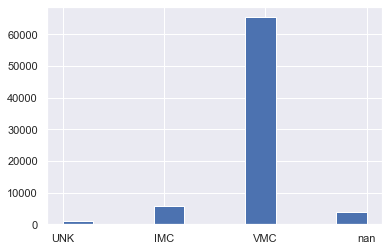

In [315]:
plt.hist(Qdf1['Weather.Condition'])

Looks like VMC has the most counts.
From googling: 
VMC: Visual Meteorological Conditions. Clear conditions. Visibility more than 5km, min. cloudbase 1500 ft
IMC: Instrument Meteorogical Conditions, is weather that require the use of instruments, typically cloudy or low visibility. These data points seems like extreme weather conditions or unclear conditions.

In [316]:
Qdf1.loc[:,'Weather.Condition'] =Qdf1.loc[:,'Weather.Condition'].fillna('VMC')

Text(0.5, 1.0, 'Weather Conditions with Crashes Counts')

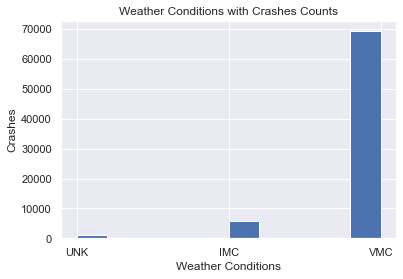

In [317]:
plt.hist(Qdf1['Weather.Condition'])
plt.xlabel('Weather Conditions')
plt.ylabel('Crashes')
plt.title('Weather Conditions with Crashes Counts')

In [318]:
Qdf1['Weather.Condition'].value_counts(normalize=True)

VMC    0.911827
IMC    0.074289
UNK    0.013884
Name: Weather.Condition, dtype: float64

Conclusion: 92% of crashes happened under VMC, or clear conditions.

# Look into weather conditions and aircraft damage

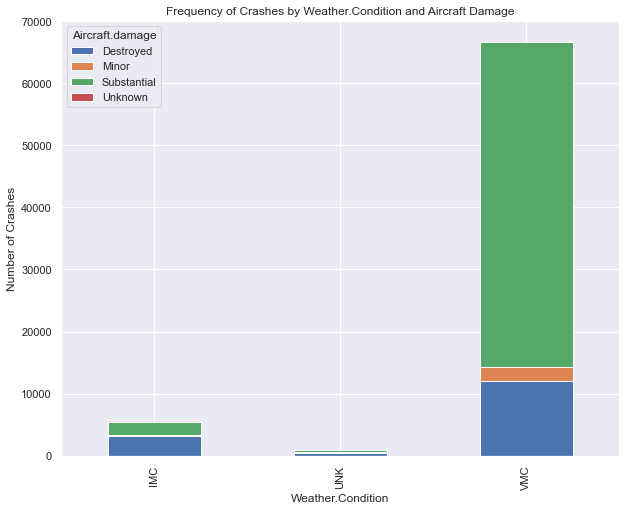

In [319]:
Qdf3 = Qdf1.groupby(['Weather.Condition', 'Aircraft.damage']).size().unstack()
Qdf3.plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Weather.Condition')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes by Weather.Condition and Aircraft Damage')
plt.show()

It seems like weather does have correlation with aircraft damage.

IMC has greater ratio for destroyed damage level.

# To Further Discover weather condition & damage level

In [320]:
Qdf1.loc[:,'Aircraft.damage'] = Qdf1.loc[:,'Aircraft.damage'].fillna(pd.Series(np.random.choice([
    'Destroyed','Substantial','Minor'], 
    p =[0.22,0.75,0.03], size= len(Qdf1))))

In [321]:
Qdf1[Qdf1['Weather.Condition'] == "VMC"]['Aircraft.damage'].value_counts(normalize=True)

Substantial    0.782855
Destroyed      0.182025
Minor          0.033688
Unknown        0.001432
Name: Aircraft.damage, dtype: float64

Under VMC weather condition, clear condition, substantial damage is 78%, while destroyed damage is 19%.

In [322]:
Qdf1[Qdf1['Weather.Condition'] == "IMC"]['Aircraft.damage'].value_counts(normalize=True)

Destroyed      0.574097
Substantial    0.397438
Minor          0.028465
Name: Aircraft.damage, dtype: float64

Under VMC weather condition, clear condition, substantial damage is 78%, while destroyed damage is 19%.

Under IMC weather condition, unclear condition, substantial damage is 57%, while destroyed damage is 41%.

Conclusion: under unclear condition or IMC, degree of damage is much greater than under clear condition or VMC.b

Qdf1 has partial cleaned up columns 'Make','Weather.Condition','Purpose.of.flight','Engine.Type','Aircraft.damage',
and a new column 'Make_and_Model'.

# Engine Type Analysis

In [323]:
#calculate crash percentage for each number of engines
AC_engines = Sdf["Number.of.Engines"].value_counts()
ENG_total = AC_engines.sum()
AC_ENG_percentage = (AC_engines / ENG_total * 100).sort_values()

In [324]:
#create a new dataframe for crash percentages
ENG_num_data = AC_ENG_percentage.reset_index()
ENG_num_data.columns= ['Num_Engines', 'Crash_Percentage']
ENG_num_data = ENG_num_data.sort_values('Num_Engines', ascending=True)

In [325]:
#calculate diminishing risk per extra engine
prev_percentage = 0
diminishing_risk = []
for index, row in ENG_num_data.iterrows():
    engines = row["Num_Engines"]
    percentage = row["Crash_Percentage"]
    diminishing_return = prev_percentage - percentage
    diminishing_risk.append((engines, diminishing_return))
    prev_percentage = percentage

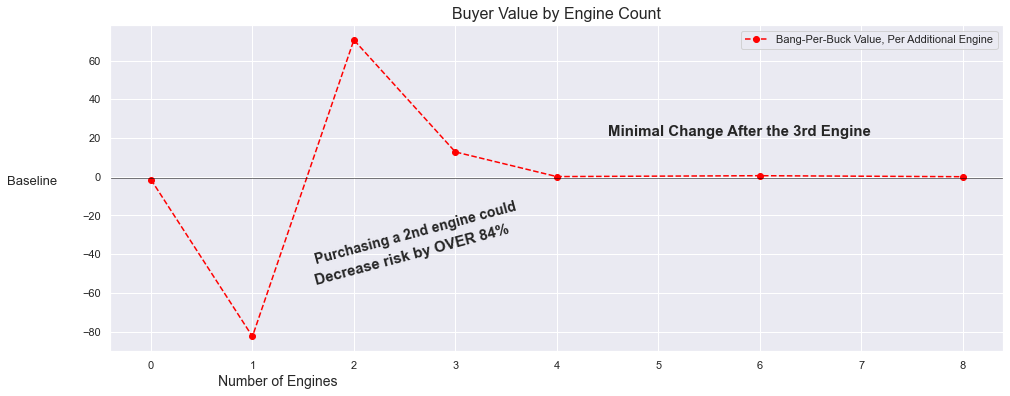

In [326]:
sns.set()
#this code creates a plot that visualizes change in 'diminishing value' for increasing engine count
x = [engines for engines, diminishing_return in diminishing_risk]
y = [diminishing_return for engines, diminishing_return in diminishing_risk]
plt.figure(figsize=(16, 6))
plt.plot(x, y, marker="o", linestyle="--", color="red", label="Bang-Per-Buck Value, Per Additional Engine")
plt.axhline(-0.5, color="black", linestyle="-", linewidth=0.5)
plt.text(1.6, -45, "Purchasing a 2nd engine could", fontsize=14, rotation=15, fontweight='bold')
plt.text(1.6, -56, "Decrease risk by OVER 84%", fontsize=15, rotation=15, fontweight='bold')
plt.text(4.5, 21, "Minimal Change After the 3rd Engine", fontsize=15, fontweight='bold')

plt.xlabel("Number of Engines", fontsize=14, ha='left', x=.12)
plt.ylabel("Baseline", fontsize=13, rotation=0, labelpad=50)
plt.title("Buyer Value by Engine Count", fontsize=16)
plt.legend()
plt.show()

In [327]:
#makes a new dataframe, to filter and rename columns for injury organizing
Injuries = Sdf.loc[:, ['Number.of.Engines', 'Engine.Type', 'Total.Uninjured', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Purpose.of.flight']]
Injuries['Engine.Type'].replace(['nan', 'Unknown', 'None', 'NONE', 'UNK'], 'NaN', inplace=True)
Injuries.rename(columns={'Total.Fatal.Injuries': 'Fatalities'}, inplace=True)

In [328]:
# fill NaN values, then calculate total survivors
Injuries['Total.Uninjured'] = Injuries['Total.Uninjured'].fillna(0)
Injuries['Total.Serious.Injuries'] = Injuries['Total.Serious.Injuries'].fillna(0)
Injuries['Total.Minor.Injuries'] = Injuries['Total.Minor.Injuries'].fillna(0)

Injuries['Survivors'] = Injuries['Total.Uninjured'] + Injuries['Total.Serious.Injuries'] + Injuries['Total.Minor.Injuries']
Injuries.drop(['Total.Uninjured', 'Total.Serious.Injuries', 'Total.Minor.Injuries'], axis=1, inplace=True)

In [329]:
#create 5 new dataframes by filtering individual engine types
reciprocating_data = Injuries[Injuries['Engine.Type'] == 'Reciprocating']
turbo_fan_data = Injuries[Injuries['Engine.Type'] == 'Turbo Fan']
turbo_jet_data = Injuries[Injuries['Engine.Type'] == 'Turbo Jet']
turbo_prop_data = Injuries[Injuries['Engine.Type'] == 'Turbo Prop']
turbo_shaft_data = Injuries[Injuries['Engine.Type'] == 'Turbo Shaft']

In [330]:
#this code expands on 'turbo_fan_data', creating a new DF that can be used to calculate survival %
turbo_fan_CLEAN = turbo_fan_data[['Engine.Type', 'Survivors', 'Fatalities']].copy()
surv_TEMP = ['Survivors', 'Fatalities']

#this code loops through each column in 'surv_TEMP' and replaces any 0 values with NaN in the 
for col in surv_TEMP:
    turbo_fan_CLEAN[col] = turbo_fan_CLEAN[col].replace(0, np.nan)
turbo_fan_CLEAN['Survivors'] = turbo_fan_CLEAN['Survivors'].fillna(0)
turbo_fan_CLEAN['Fatalities'] = turbo_fan_CLEAN['Fatalities'].fillna(0)

#then, those results are stored in these 2 variables
total_survivorsF = turbo_fan_CLEAN['Survivors'].sum()
total_fatalitiesF = turbo_fan_CLEAN['Fatalities'].sum()

#this code calculates the total number of survivors and fatalities, then calculates the survival percentage for 
#incidents involving turbo fan engines 'total_survivors' by 'total_result', and multiplying the result by 100.
total_resultF = total_survivorsF + total_fatalitiesF
survival_percentageF = (total_survivorsF / total_resultF) * 100
#the resulting percentage is stored in 'survival_percentageF'

In [331]:
#same, I copy/pasted 'jet' and 'J'
turbo_jet_CLEAN = turbo_jet_data[['Engine.Type', 'Survivors', 'Fatalities']].copy()
surv_TEMP = ['Survivors', 'Fatalities']
for col in surv_TEMP:
    turbo_jet_CLEAN[col] = turbo_jet_CLEAN[col].replace(0, np.nan)
turbo_jet_CLEAN['Survivors'] = turbo_jet_CLEAN['Survivors'].fillna(0)
turbo_jet_CLEAN['Fatalities'] = turbo_jet_CLEAN['Fatalities'].fillna(0)
total_survivorsJ = turbo_jet_CLEAN['Survivors'].sum()
total_fatalitiesJ = turbo_jet_CLEAN['Fatalities'].sum()

total_resultJ = total_survivorsJ + total_fatalitiesJ
survival_percentageJ = (total_survivorsJ / total_resultJ) * 100
survival_percentageJ

97.57422259743915

In [332]:
#same, I copy/pasted 'prop' and 'P'
turbo_prop_CLEAN = turbo_prop_data[['Engine.Type', 'Survivors', 'Fatalities']].copy()
surv_TEMP = ['Survivors', 'Fatalities']
for col in surv_TEMP:
    turbo_prop_CLEAN[col] = turbo_prop_CLEAN[col].replace(0, np.nan)
turbo_prop_CLEAN['Survivors'] = turbo_prop_CLEAN['Survivors'].fillna(0)
turbo_prop_CLEAN['Fatalities'] = turbo_prop_CLEAN['Fatalities'].fillna(0)
total_survivorsP = turbo_prop_CLEAN['Survivors'].sum()
total_fatalitiesP = turbo_prop_CLEAN['Fatalities'].sum()

total_resultP = total_survivorsP + total_fatalitiesP
survival_percentageP = (total_survivorsP / total_resultP) * 100
survival_percentageP

87.76093794681155

In [333]:
#same, I copy/pasted 'shaft' and 'S'
turbo_shaft_CLEAN = turbo_shaft_data[['Engine.Type', 'Survivors', 'Fatalities']].copy()
surv_TEMP = ['Survivors', 'Fatalities']
for col in surv_TEMP:
    turbo_shaft_CLEAN[col] = turbo_shaft_CLEAN[col].replace(0, np.nan)
turbo_shaft_CLEAN['Survivors'] = turbo_shaft_CLEAN['Survivors'].fillna(0)
turbo_shaft_CLEAN['Fatalities'] = turbo_shaft_CLEAN['Fatalities'].fillna(0)
total_survivorsS = turbo_shaft_CLEAN['Survivors'].sum()
total_fatalitiesS = turbo_shaft_CLEAN['Fatalities'].sum()

total_resultS = total_survivorsS + total_fatalitiesS
survival_percentageS = (total_survivorsS / total_resultS) * 100
survival_percentageS

81.83863709418193

In [334]:
#same, I copy/pasted 'reciprocating' and 'R'
reciprocating_CLEAN = reciprocating_data[['Engine.Type', 'Survivors', 'Fatalities']].copy()
surv_TEMP = ['Survivors', 'Fatalities']
for col in surv_TEMP:
    reciprocating_CLEAN[col] = reciprocating_CLEAN[col].replace(0, np.nan)
reciprocating_CLEAN['Survivors'] = reciprocating_CLEAN['Survivors'].fillna(0)
reciprocating_CLEAN['Fatalities'] = reciprocating_CLEAN['Fatalities'].fillna(0)
total_survivorsR = reciprocating_CLEAN['Survivors'].sum()
total_fatalitiesR = reciprocating_CLEAN['Fatalities'].sum()

total_resultR = total_survivorsR + total_fatalitiesR
survival_percentageR = (total_survivorsR / total_resultR) * 100
survival_percentageR

81.7682668208984

In [335]:
#this code combines the previous calcs. by passing a dictionary with column names, and corresponding values
combined_data = pd.DataFrame({'Engine.Type': ['Turbo Fan', 'Turbo Jet', 'Turbo Prop', 'Turbo Shaft', 'Reciprocating'],
    'Survivors': [total_survivorsF, total_survivorsJ, total_survivorsP, total_survivorsS, total_survivorsR],
    'Fatalities': [total_fatalitiesF, total_fatalitiesJ, total_fatalitiesP, total_fatalitiesS, total_fatalitiesR]})

In [336]:
#this code calculates the 'Survival_Percentage' for each engine type by dividing 'Survivors' by ('Survivors' + 'Fatalities' * 100)
combined_data['Survival_Percentage'] = (combined_data['Survivors'] / (combined_data['Survivors'] + combined_data['Fatalities'])) * 100

In [337]:
#this code checks and sotres fatality percentage for each engine, by subtracting 'Survival_Percentage' from 100. EASY!
combined_data['Fatality_Percentage'] = 100 - combined_data['Survival_Percentage']

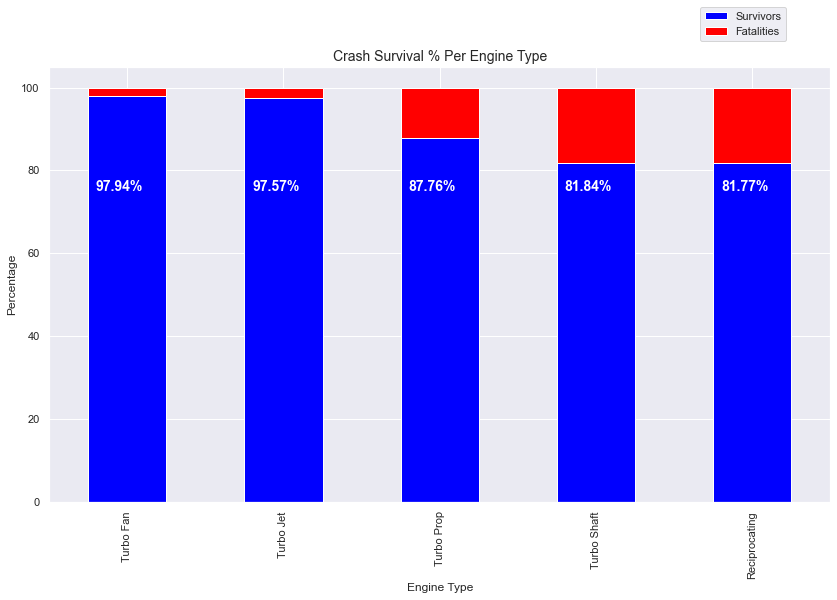

In [338]:
# plot
ax = combined_data.plot(x='Engine.Type', y=['Survival_Percentage', 'Fatality_Percentage'],
kind='bar', stacked=True, color=['blue', 'red'], figsize=(14, 8))

plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Crash Survival % Per Engine Type', fontsize=14)

plt.text(-.2, 75, "97.94%", fontsize=14, fontweight='bold', color='white')
plt.text(.8, 75, "97.57%", fontsize=14, fontweight='bold', color='white')
plt.text(1.8, 75, "87.76%", fontsize=14, fontweight='bold', color='white')
plt.text(2.8, 75, "81.84%", fontsize=14, fontweight='bold', color='white')
plt.text(3.8, 75, "81.77%", fontsize=14, fontweight='bold', color='white')

ax.legend(["Survivors", "Fatalities"], bbox_to_anchor=(.95, 1.15))
plt.show()